In [89]:
#importing necessary libraries
import numpy as np
import pandas as pd
import wordcloud,string,re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from string import punctuation
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from keras import backend as K
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM,Dense,Bidirectional,Input
from keras.models import Model
import torch
import transformers

In [90]:
#Reading datasets
imdb=pd.read_csv('IMDB_Dataset.csv')

In [91]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [92]:
#info of data of dataset
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [93]:
#Identification of null or missing data
mis_data=imdb.isnull().sum()
print(mis_data)

review       0
sentiment    0
dtype: int64


In [94]:
#as no missing data is present we will check for duplicate data
dupl_data=imdb.duplicated().sum()
print(dupl_data)

418


In [95]:
#removing duplicate data
imdb.drop_duplicates(keep='first',inplace=True)

In [96]:
imdb.shape

(49582, 2)

In [97]:
#Removing useless words from our review sentences
stp=set(stopwords.words('english'))
punct=list(string.punctuation)
stp.add(tuple(punct))
wl=WordNetLemmatizer()

In [98]:
#Removing html tags
def remove_html(text):
    sp=BeautifulSoup(text,"html.parser")
    return sp.get_text()

#Removing url's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

#Removing brackets
def remove_bracket(text):
   return re.sub('\[[^]]*\]', '', text)

#Removing stopwords
def remove_stopwords(text,lemmatize=True):
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stp and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stp and word.isalpha()]) 
    return text
#Summing all the cleaning in one function
def clean_text(text,lemmatize=True):
    text=remove_html(text)
    text=remove_bracket(text)
    text=remove_url(text)
    text=remove_stopwords(text)
    return text
 


In [99]:
#Final cleaning of data
imdb['review']=imdb['review'].apply(clean_text,lemmatize=True)

c:\Users\Shreya Mishra\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [100]:
#Replacing sentiment values with numeric values
imdb.sentiment.replace("negative",0,inplace=True)
imdb.sentiment.replace("positive",1,inplace=True) 

In [101]:
#Exploration of data
print('Positive reviews', imdb['sentiment'].value_counts()[0],imdb['sentiment'].value_counts()[0]/len(imdb) * 100,"%")
print('Negative reviews', imdb['sentiment'].value_counts()[1],imdb['sentiment'].value_counts()[1]/len(imdb) * 100,"%")

Positive reviews 24698 49.81243193094268 %
Negative reviews 24884 50.18756806905732 %


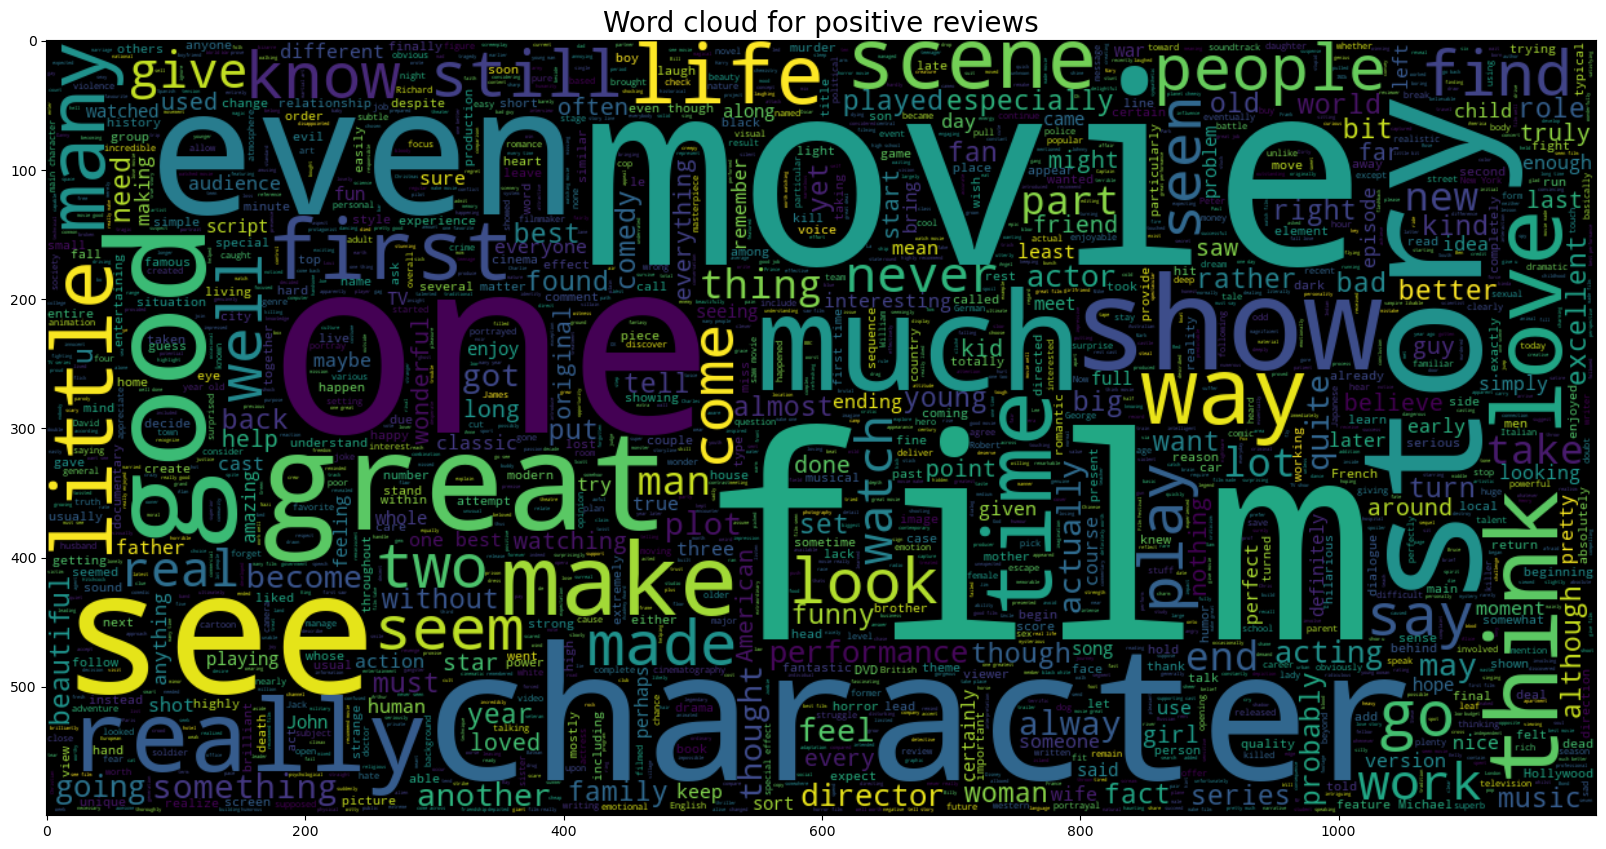

In [102]:
#word cloud for positive reviews
pos_data = imdb[imdb.sentiment == 1]['review']
pos_data_string = ' '.join(pos_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(pos_data_string)
plt.imshow(wc , interpolation = 'bilinear')
#plt.axis('on')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

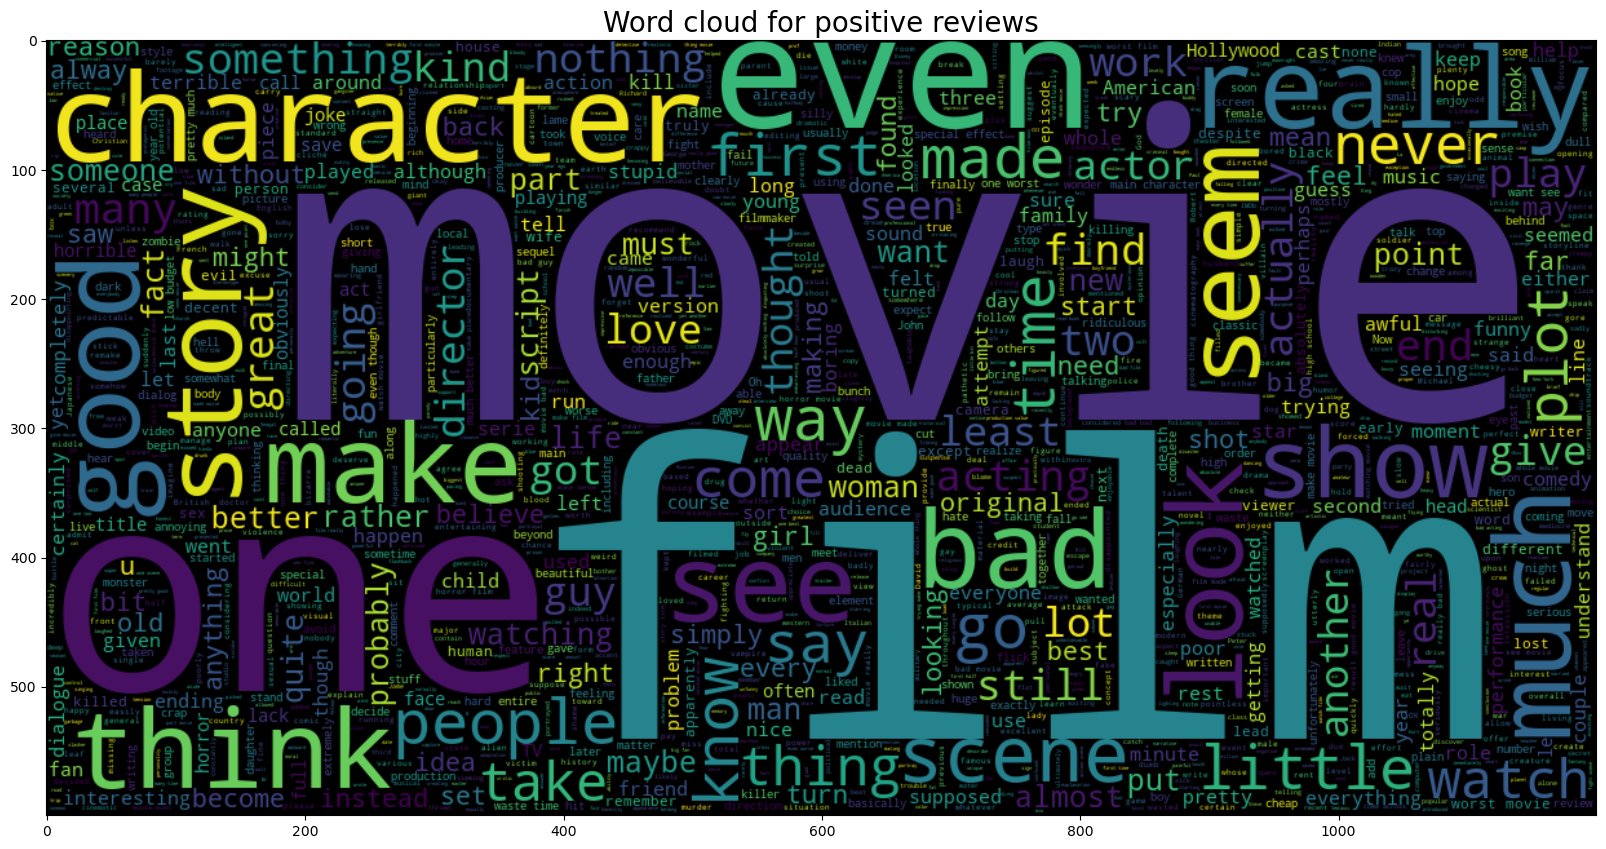

In [103]:
#word cloud for negative reviews
pos_data = imdb[imdb.sentiment == 0]['review']
pos_data_string = ' '.join(pos_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(pos_data_string)
plt.imshow(wc , interpolation = 'bilinear')
#plt.axis('on')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

In [104]:
#Predictive Modelling using Machine Learning
#splitting into train and test
train, test= train_test_split(imdb, test_size=0.2, random_state=1)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']
#splitting the train set into train and validation
Xtrain,Xval,ytrain,yval=train_test_split(X_train,y_train,
                                             test_size=0.2,random_state=10)


In [105]:
#Vectorizing data using  

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


count_vect = CountVectorizer() # CountVectorizer
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

Logistic Regression Accuracy : 87.44%


c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


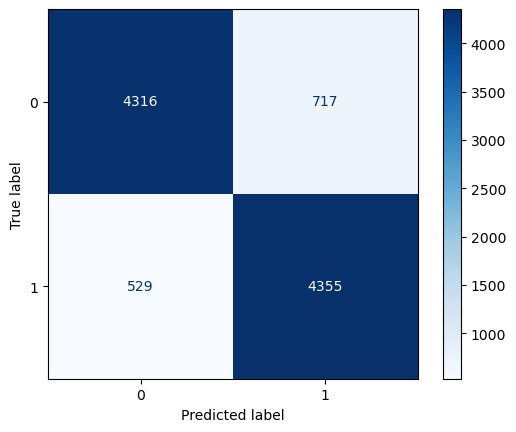

In [106]:
#Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)
p1=lr.predict(X_test_tfidf)
s1=accuracy_score(y_test,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, X_test_tfidf, y_test,cmap = 'Blues')
plt.grid(False)

c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Logistic Regression Accuracy : 86.19%


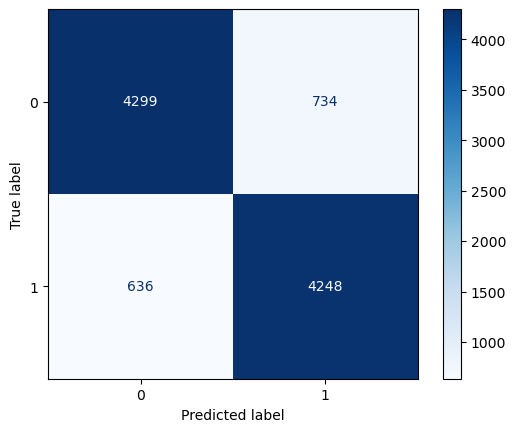

In [107]:
#Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_count,y_train)
p1=lr.predict(X_test_count)
s1=accuracy_score(y_test,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, X_test_count, y_test,cmap = 'Blues')
plt.grid(False)

In [108]:
#We will use tf_idf as it offers better accuracy with logistic regression

Linear Support Vector Classifier Accuracy : 87.63%


c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


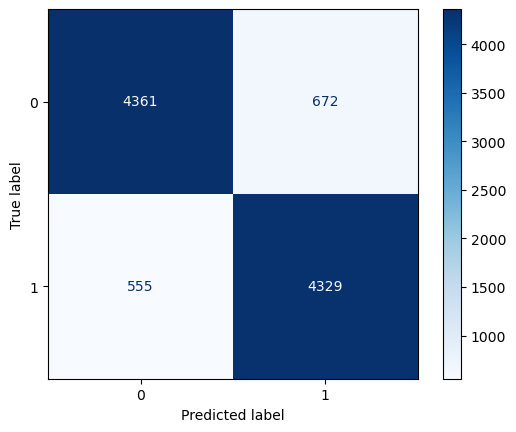

In [109]:
# Implementing Linear Support Vector Machine model
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(X_train_tfidf,y_train)
p3=linear_svc.predict(X_test_tfidf)
s3=accuracy_score(y_test,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, X_test_tfidf, y_test,cmap = 'Blues')
plt.grid(False)

c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Linear Support Vector Classifier Accuracy : 83.64%


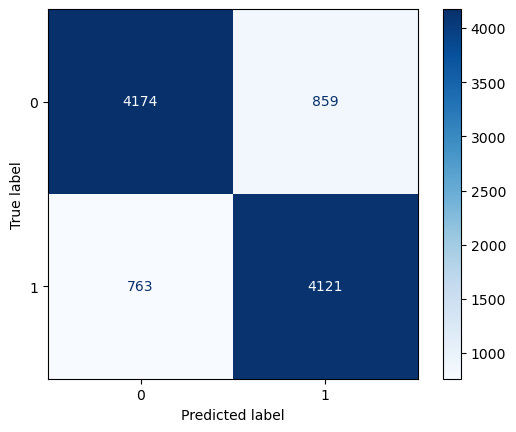

In [110]:
# Implementing Linear Support Vector Machine model
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(X_train_count,y_train)
p3=linear_svc.predict(X_test_count)
s3=accuracy_score(y_test,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, X_test_count, y_test,cmap = 'Blues')
plt.grid(False)

In [111]:
#We will use tf_idf as it offers better accuracy with linear Support Vector Machine

In [112]:
x_train,x_test,y_train,y_test = train_test_split(imdb.review,imdb.sentiment,random_state = 0 , stratify = imdb.sentiment)

In [113]:
#Implementing BERT model
#Performing Tokenization and # automatically download the vocab used during pretraining or fine-tuning a given model,use from_pretrained() method
from tokenizers import BertWordPieceTokenizer
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased' , lower = True)
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

In [119]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=400):

    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [120]:
x_train = fast_encode(x_train.values, fast_tokenizer, maxlen=400)
x_test = fast_encode(x_test.values, fast_tokenizer, maxlen=400)

In [121]:
def build_model(transformer, max_len=400):
    
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [122]:
bert_model = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [123]:
model = build_model(bert_model, max_len=400)
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 400)]            0         
                                                                 
 tf_distil_bert_model_1 (TFD  TFBaseModelOutput(last_h  66362880 
 istilBertModel)             idden_state=(None, 400,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dense (Dense)               (None, 1)                 769       
                                                             

In [130]:
history = model.fit(x_train,y_train,batch_size = 16 ,validation_data=(x_test,y_test),epochs = 3)

Epoch 1/3


In [ ]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

In [ ]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict(x_test)
pred[:5]

In [ ]:
pred = np.round(pred).astype(int)
pred[:5]

In [ ]:
print(classification_report(y_test, pred, target_names = ['Bad Reviews','Good Reviews']))

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

NameError: name 'pred' is not defined

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")